# 1. Introduction

## 1.1. Mục tiêu
Phân tích dữ liệu học tập của học sinh, tìm hiểu yếu tố ảnh hưởng đến điểm thi cuối kỳ, và khám phá mô hình dự đoán.

## 1.2. [About Student Performance Prediction Dataset 🎓📊](https://www.kaggle.com/datasets/amrmaree/student-performance-prediction/data)

### 1.2.1. Overview
This dataset contains information about students' academic performance, study habits, and external factors affecting their final exam scores. It is designed for predictive modeling, data visualization, and educational analytics.

### 1.2.2 Dataset Purpose
This dataset is useful for:
- Predicting student final exam scores 📈
- Identifying key factors that impact academic performance 🎯
- Exploring feature importance in education-related datasets 📊
- Building machine learning models for regression and classification 🤖
### 1.2.3. Columns Description
| Column Name | Description |
| ----------- | ----------- |
| Student_ID | Unique identifier for each student. |
| Gender | Gender of the student (Male/Female). |
| Study_Hours_per_Week | Average number of study hours per week. |
| Attendance_Rate | Attendance percentage (50% - 100%). |
| Past_Exam_Scores | Average score of previous exams (50 - 100). |
| Parental_Education_Level | Education level of parents (High School, Bachelors, Masters, PhD). |
| Internet_Access_at_Home | Whether the student has internet access at home (Yes/No). |
| Extracurricular_Activities | Whether the student participates in extracurricular activities (Yes/No). |
| Final_Exam_Score (Target) | The final exam score of the student (50 - 100, integer values). |
| Pass_Fail (Target) | The student status (Pass/Fail). |

## 1.3. Small Inference
Observing these 2 rows in the dataset:
- S315,Male,25,78.88159770457736,81,High School,No,No,59,Fail
- S408,Female,35,87.08434721143328,73,Masters,No,Yes,60,Pass

If Score < 60 then Fail, otherwise, Pass

# 2. General exploration

In [43]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [14]:
original_spp = Table.read_table('student_performance_dataset.csv')
original_spp.show(5)

Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
S147,Male,31,68.2678,86,High School,Yes,Yes,63,Pass
S136,Male,16,78.2229,73,PhD,No,No,50,Fail
S209,Female,21,87.5251,74,PhD,Yes,No,55,Fail
S458,Female,27,92.0765,99,Bachelors,No,No,65,Pass
S078,Female,37,98.6555,63,Masters,No,Yes,70,Pass


### Kiểm tra kích thước và cấu trúc

In [15]:
# Số lượng dòng (sinh viên)
print("Số dòng (sinh viên):", original_spp.num_rows)

# Số lượng cột (thuộc tính)
print("Số cột:", original_spp.num_columns)

# Tên các cột
original_spp.labels

Số dòng (sinh viên): 708
Số cột: 10


('Student_ID',
 'Gender',
 'Study_Hours_per_Week',
 'Attendance_Rate',
 'Past_Exam_Scores',
 'Parental_Education_Level',
 'Internet_Access_at_Home',
 'Extracurricular_Activities',
 'Final_Exam_Score',
 'Pass_Fail')

### Kiểm tra dữ liệu thiếu

In [16]:
# Tạo bảng mới kiểm tra giá trị rỗng trong từng cột
def count_missing(column):
    return sum(original_spp.column(column) == '')

Table().with_columns(
    'Cột', original_spp.labels,
    'Số giá trị thiếu', [count_missing(col) for col in original_spp.labels]
).show()


Cột,Số giá trị thiếu
Student_ID,0
Gender,0
Study_Hours_per_Week,0
Attendance_Rate,0
Past_Exam_Scores,0
Parental_Education_Level,0
Internet_Access_at_Home,0
Extracurricular_Activities,0
Final_Exam_Score,0
Pass_Fail,0


### Nhận xét tổng quan
- Dataset Student Performance Prediction có 708 sinh viên. Mỗi sinh viên có 9 đặc trưng (không tính ID)
- Dữ liệu gồm cả biến categorical như Gender, Parental_Education_Level, Internet_Access_at_Home, Extracurricular_Activities, Pass_Fail và biến numerical như Study_Hours_per_Week, Attendance_Rate, Past_Exam_Scores, Final_Exam_Score
- Dữ liệu đầy đủ, không đặc trưng nào bị thiếu

# 3. 📊 Univariate visualization & simple statistics

## 3.1. Categorical
Trực quan hóa phân bố của 1 biến categorical -> Sử dụng Bar chart

In [17]:
# Danh sách các cột phân loại
spp_categorical_cols = [
    'Gender',
    'Parental_Education_Level',
    'Internet_Access_at_Home',
    'Extracurricular_Activities',
    'Pass_Fail'
]

--- Gender ---


Gender,count,Percentage
Female,375,52.9661
Male,333,47.0339


--- Parental_Education_Level ---


Parental_Education_Level,count,Percentage
Bachelors,189,26.6949
High School,183,25.8475
Masters,171,24.1525
PhD,165,23.3051


--- Internet_Access_at_Home ---


Internet_Access_at_Home,count,Percentage
No,381,53.8136
Yes,327,46.1864


--- Extracurricular_Activities ---


Extracurricular_Activities,count,Percentage
No,361,50.9887
Yes,347,49.0113


--- Pass_Fail ---


Pass_Fail,count,Percentage
Fail,354,50
Pass,354,50


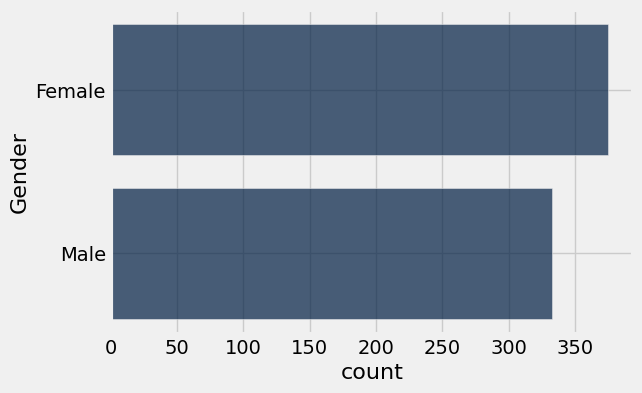

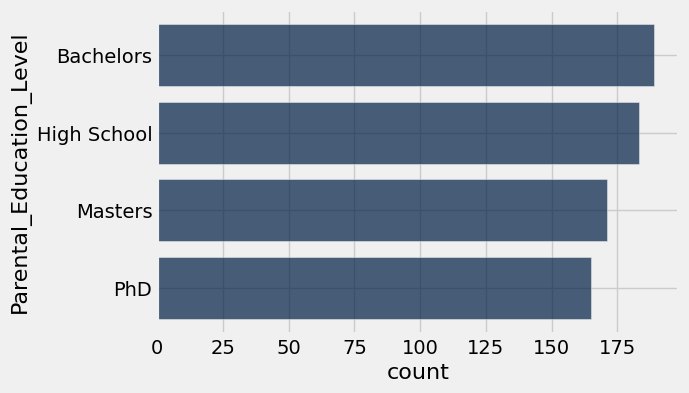

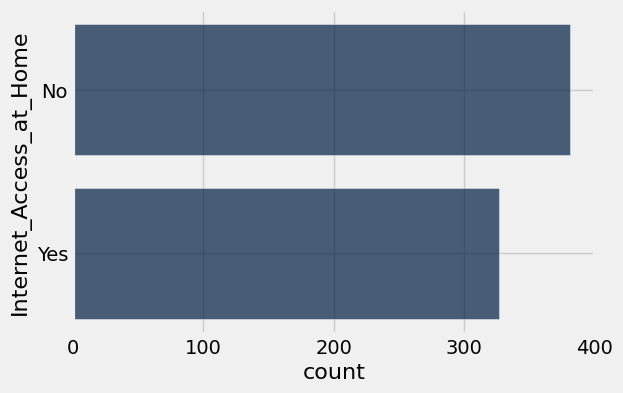

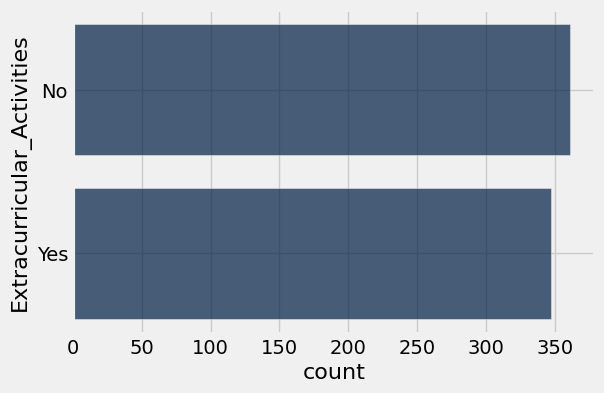

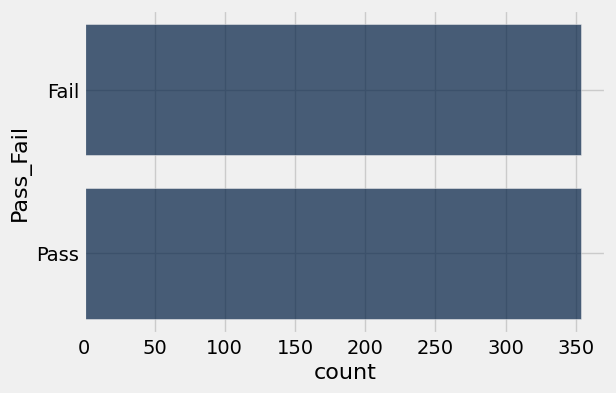

In [18]:
# Hàm phân tích cho từng cột
def analyze_categorical_column(col):
    print(f'--- {col} ---')
    
    # Đếm số lượng từng nhóm
    counts = original_spp.group(col)
    total = original_spp.num_rows
    
    # Tính tỷ lệ phần trăm
    percent = counts.with_column('Percentage', counts.column('count') / total * 100)
    
    # Hiển thị bảng tần suất
    percent.show()

    # Vẽ biểu đồ
    counts.barh(col)

# Chạy phân tích cho từng biến
for col in spp_categorical_cols:
    analyze_categorical_column(col)

## 3.2. Numerical
Trực quan hóa phân bố 1 biến numerical -> sử dụng Histogram

In [19]:
# Chọn các cột numerical để phân tích
spp_numeric_cols = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Final_Exam_Score']

Column,Min,Max,Mean,Median,Std Dev
Study_Hours_per_Week,10,39,26.1328,27,8.87145
Attendance_Rate,50.117,99.9677,78.1077,79.363,13.7931
Past_Exam_Scores,50,100,77.8715,79,14.3926
Final_Exam_Score,50,77,58.7712,59.5,6.70114


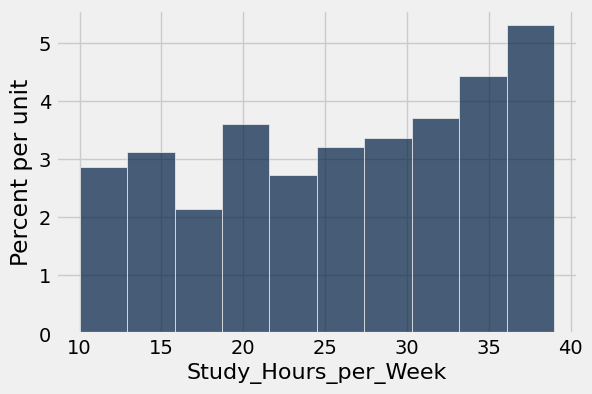

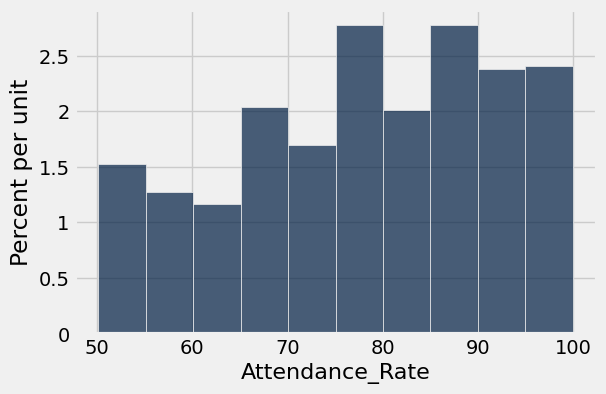

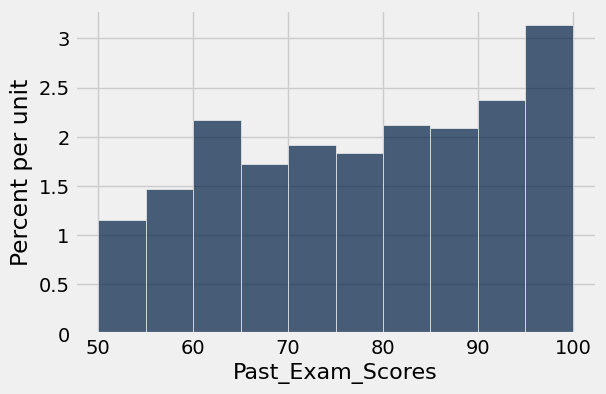

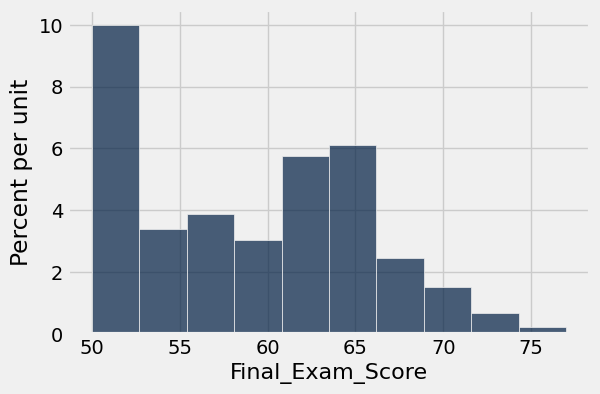

In [20]:
# Tạo bảng thống kê mô tả
def describe_column(col):
    data = original_spp.column(col)
    return [
        np.min(data),
        np.max(data),
        np.mean(data),
        np.median(data),
        np.std(data)
    ]

summary = Table().with_columns(
    'Column', spp_numeric_cols,
    'Min', [describe_column(col)[0] for col in spp_numeric_cols],
    'Max', [describe_column(col)[1] for col in spp_numeric_cols],
    'Mean', [describe_column(col)[2] for col in spp_numeric_cols],
    'Median', [describe_column(col)[3] for col in spp_numeric_cols],
    'Std Dev', [describe_column(col)[4] for col in spp_numeric_cols]
)

summary.show()

for col in spp_numeric_cols:
    original_spp.hist(col, bins=10)


# 4. 🔗 Relation visualization

## 4.1. Relation between 2 numerical variables
Using Scatter plot

### 4.1.1. Relation with Final_Exam_Score

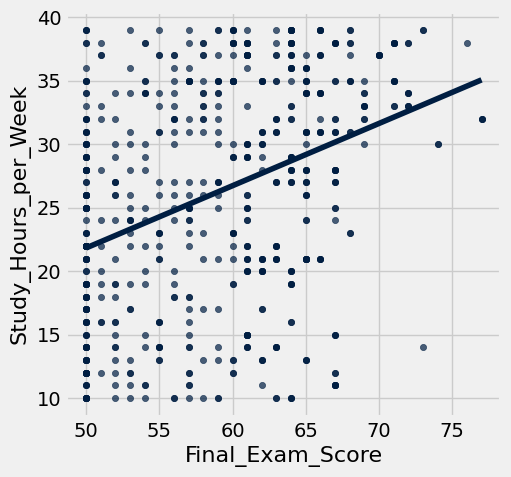

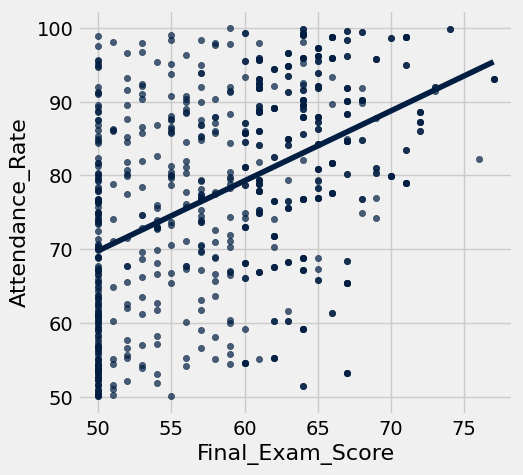

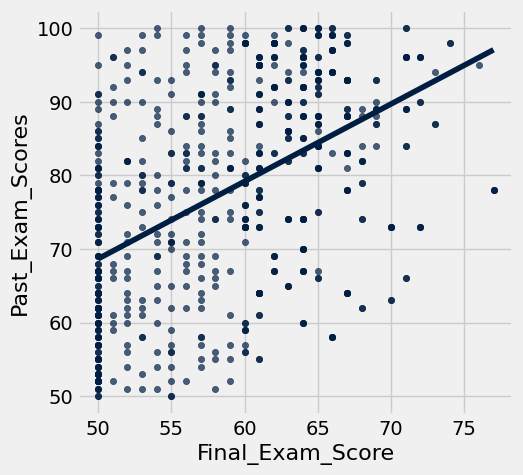

In [33]:
for col in spp_numeric_cols:
    if col != 'Final_Exam_Score':
        original_spp.scatter('Final_Exam_Score', col, fit_line=True)


### 4.1.2. Relation between 3 attributes

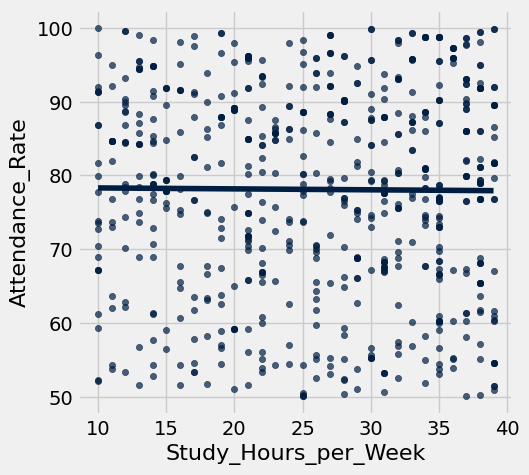

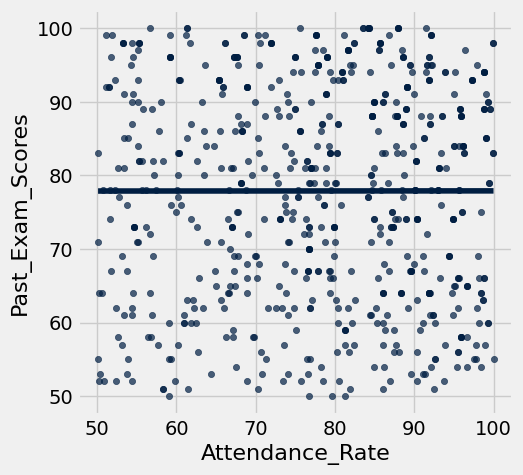

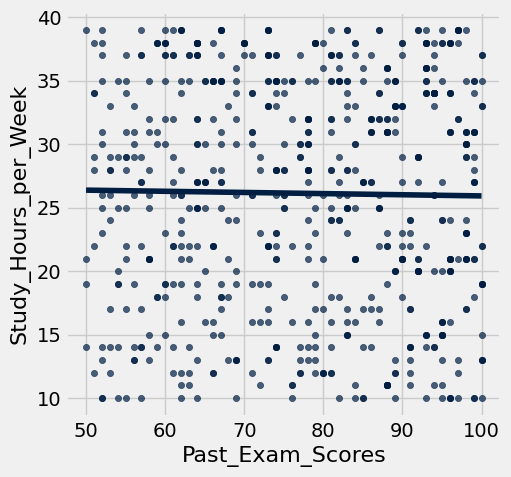

In [31]:
original_spp.scatter('Study_Hours_per_Week', 'Attendance_Rate', fit_line=True)
original_spp.scatter('Attendance_Rate', 'Past_Exam_Scores', fit_line=True)
original_spp.scatter('Past_Exam_Scores', 'Study_Hours_per_Week', fit_line=True)

### Nhận xét tổng quan
- Mối quan hệ giữa 3 attributes: Study_Hours_per_Week, Attendance_rate, Past_Exam_Scores với Final_exam_score có vẻ tương quan khá
- Mối quan hệ giữa 3 attributes với nhau không

## 4.2. Relation between a categorical & a numerical variable
Using Bar chart

### 4.2.1. Relation giữa numeric variable và Pass_Fail

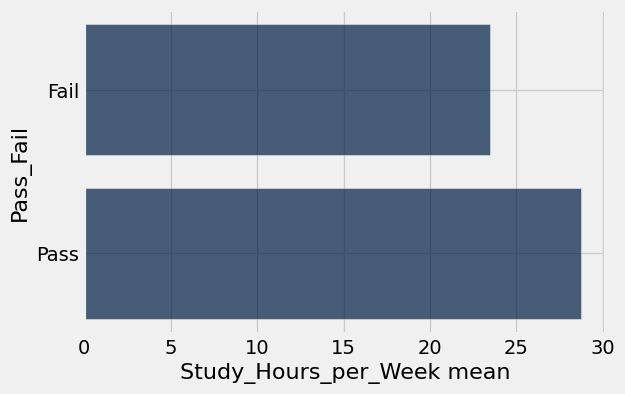

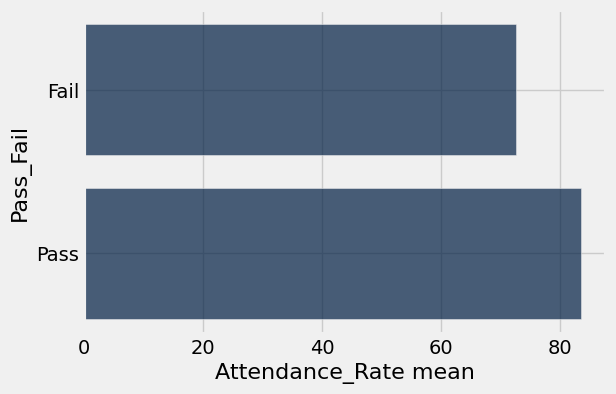

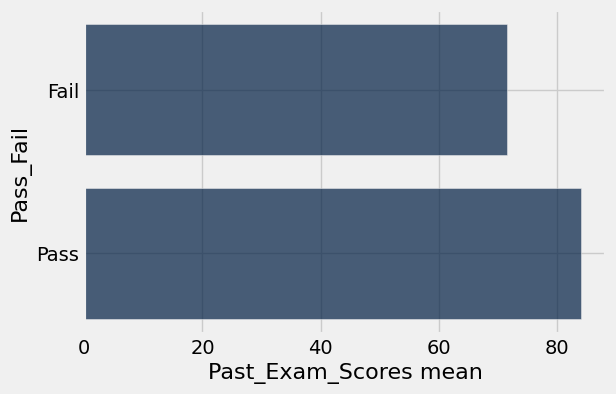

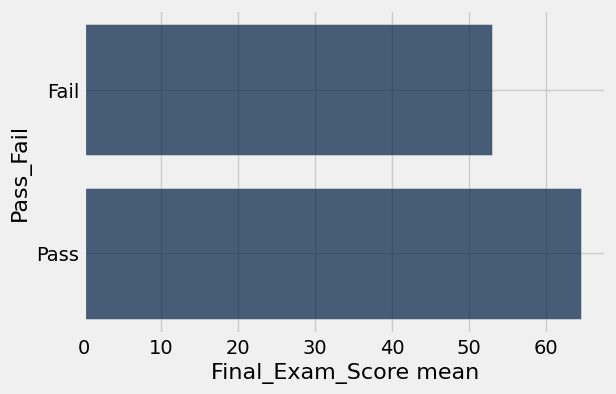

In [37]:
for col in spp_numeric_cols:
    original_spp.select('Pass_Fail', col).group('Pass_Fail', np.mean).barh('Pass_Fail')

### 4.2.2. Relation giữa categorical variable và Final_Exam_Scores

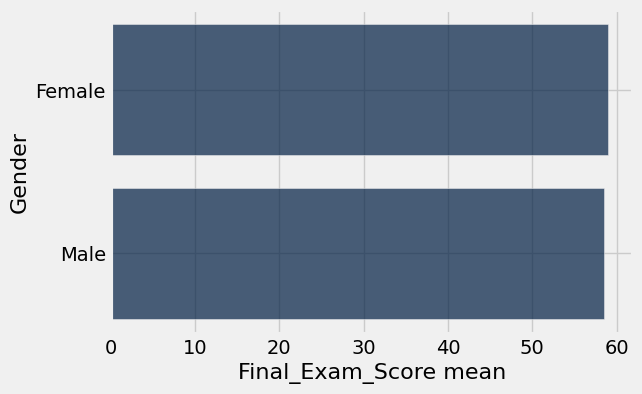

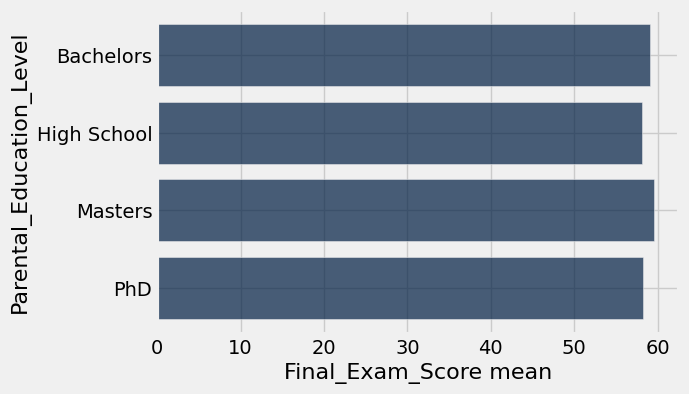

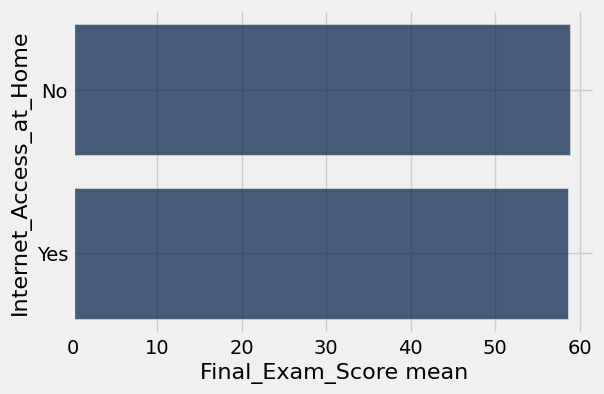

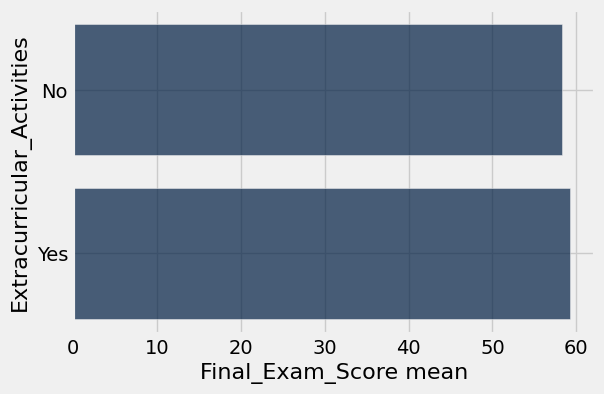

In [41]:
for col in spp_categorical_cols:
    if col != 'Pass_Fail':
        original_spp.select('Final_Exam_Score', col).group(col, np.mean).barh(col)

### Nhận xét tổng quan
- Các dữ liệu numeric có vẻ có ý nghĩa hơn vì giữa 2 nhóm Pass và Fail thì giá trị trung bình có chêch lệch, cụ thể thì nhóm Pass có các giá trị trung bình của chỉ số về Study_Hours_per_week, Attendance_rate, Past_Exam_Scores cao hơn
- Dữ liệu categorical (Gender, Parental_Education_Level, Internet_Access_at_Home, Extracurricular_Activities) có vẻ không ảnh hưởng nhiều tới kết quả vì quan sát trung bình Final_Exam_Score thì giữa các nhóm xấp xỉ nhau

# 5. Hypothesis testing

## 5.1. Categorical effects

### 5.1.1. Liệu giới tính (Gender) có ảnh hưởng đến điểm thi cuối kỳ không?
- H0: Trung bình Final_Exam_Score của Male bằng Female.
- H1: Trung bình Final_Exam_Score của Male khác Female (two-sided test).
- Test statistic: Sự khác biệt giữa trung bình điểm của Male và Female: abs(mean_male - mean_female).
- Phương pháp: Permutation test, xáo trộn nhãn Gender để mô phỏng H0.

### 5.1.2. Liệu học vấn của phụ huuynh (Parental_Education_Level) có ảnh hưởng đến điểm thi cuối kỳ không?
- H0: Trung bình Final_Exam_Score của nhóm có internet (Yes) bằng nhóm không có internet (No).
- H1: Trung bình Final_Exam_Score của nhóm có internet cao hơn (one-sided test).
- Test statistic: Sự khác biệt giữa trung bình điểm của nhóm Yes và No: abs(mean_yes - mean_no).
- Phương pháp: Permutation test, xáo trộn nhãn Internet_Access_at_Home.

### 5.1.3. Liệu khả năng truy cập được mạng ở nhà (Internet_Access_at_Home) có ảnh hưởng đến điểm thi cuối kỳ không?
- H0: Trung bình Study_Hours_per_Week của nhóm Pass bằng nhóm Fail.
- H1: Trung bình Study_Hours_per_Week của nhóm Pass cao hơn (one-sided test).
- Test statistic: Sự khác biệt giữa trung bình giờ học của nhóm Pass và Fail: abs(mean_pass - mean_fail).
- Phương pháp: Permutation test, xáo trộn nhãn Pass_Fail.

### 5.1.4. Liệu khả việc tham gia hoạt động ngoại khóa (Extracurricular_Activities) có ảnh hưởng đến điểm thi cuối kỳ không?
- H0: Trung bình Final_Exam_Score của nhóm tham gia (Yes) bằng nhóm không tham gia (No).
- H1: Trung bình Final_Exam_Score của nhóm tham gia khác nhóm không tham gia (two-sided test).
- Test statistic: Sự khác biệt giữa trung bình điểm của nhóm Yes và No: abs(mean_yes - mean_no).
- Phương pháp: Permutation test, xáo trộn nhãn Extracurricular_Activities.

## 5.2. Numerical effects

### 5.2.1. Liệu học sinh Pass có thời gian dành cho việc học trong tuần (Study_Hours_per_week) nhiều hơn học sinh Fail không?
- H0: Trung bình Study_Hours_per_week của nhóm Pass bằng nhóm Fail.
- H1: Trung bình Study_Hours_per_week của nhóm Pass cao hơn (one-sided test).
- Test statistic: Sự khác biệt giữa trung bình tỷ lệ đi học của nhóm Pass và Fail: abs(mean_pass - mean_fail).
- Phương pháp: Permutation test, xáo trộn nhãn Pass_Fail.

### 5.2.1. Liệu học sinh Pass có tỷ lệ đi học (Attendance_rate) cao hơn học sinh Fail không?
- H0: Trung bình Attendance_rate của nhóm Pass bằng nhóm Fail.
- H1: Trung bình Attendance_Rate của nhóm Pass cao hơn (one-sided test).
- Test statistic: Sự khác biệt giữa trung bình tỷ lệ đi học của nhóm Pass và Fail: abs(mean_pass - mean_fail).
- Phương pháp: Permutation test, xáo trộn nhãn Pass_Fail.

### 5.2.1. Liệu học sinh Pass có điểm trung bình các bài kiểm tra trước đấy (Past_Exam_Scores) cao hơn học sinh Fail không?
- H0: Trung bình Past_Exam_Scores của nhóm Pass bằng nhóm Fail.
- H1: Trung bình Past_Exam_Scores của nhóm Pass cao hơn (one-sided test).
- Test statistic: Sự khác biệt giữa trung bình tỷ lệ đi học của nhóm Pass và Fail: abs(mean_pass - mean_fail).
- Phương pháp: Permutation test, xáo trộn nhãn Pass_Fail.

# 6. Tương quan - Correlation

Define công thức tính correlaion

In [21]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

#### Numeric

In [22]:
# Lấy bảng con chỉ chứa các cột numerical này
numerical_data = original_spp.select(spp_numeric_cols)
numerical_data.show(5)

Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
31,68.2678,86,63
16,78.2229,73,50
21,87.5251,74,55
27,92.0765,99,65
37,98.6555,63,70


In [23]:
print(f'Correlation between Study_Hours_per_Week and Final_Exam_Score: {correlation(numerical_data, 'Study_Hours_per_Week', 'Final_Exam_Score')}')
print(f'Correlation between Attendance_Rate and Final_Exam_Score: {correlation(numerical_data, 'Attendance_Rate', 'Final_Exam_Score')}')
print(f'Correlation between Past_Exam_Scores and Final_Exam_Score: {correlation(numerical_data, 'Past_Exam_Scores', 'Final_Exam_Score')}')


Correlation between Study_Hours_per_Week and Final_Exam_Score: 0.37038693066644807
Correlation between Attendance_Rate and Final_Exam_Score: 0.4604775536334199
Correlation between Past_Exam_Scores and Final_Exam_Score: 0.48951569382078053


#### Categorical

In [24]:
original_spp.select('Gender', 'Final_Exam_Score').group('Gender', np.mean)

Gender,Final_Exam_Score mean
Female,58.9787
Male,58.5375


In [25]:
original_spp.select('Parental_Education_Level', 'Final_Exam_Score').group('Parental_Education_Level', np.mean)


Parental_Education_Level,Final_Exam_Score mean
Bachelors,59.127
High School,58.1257
Masters,59.5906
PhD,58.2303


In [26]:
original_spp.select('Internet_Access_at_Home', 'Final_Exam_Score').group('Internet_Access_at_Home', np.mean)


Internet_Access_at_Home,Final_Exam_Score mean
No,58.853
Yes,58.6758


In [27]:
original_spp.select('Extracurricular_Activities', 'Final_Exam_Score').group('Extracurricular_Activities', np.mean)

Extracurricular_Activities,Final_Exam_Score mean
No,58.3269
Yes,59.2334


# 📌 Kết luận - Conclusion
